### Rain Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
rain = pd.read_excel('RainPrediction.xlsx')
rain.columns = rain.columns.str.strip()
rain.head()

,ID,Place,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury39783,Albury,13.4,22.9,0.0,0.0,44,20,24,71,22,1007.7,1007.1,8,0,16.9,21.8,0,0
1,Albury39784,Albury,7.4,25.1,0.0,0.0,44,4,22,44,25,1010.6,1007.8,0,0,17.2,24.3,0,0
2,Albury39785,Albury,12.9,25.7,0.0,0.0,46,19,26,38,30,1007.6,1008.7,0,2,21.0,23.2,0,0
3,Albury39786,Albury,9.2,28.0,0.0,0.0,24,11,9,45,16,1017.6,1012.8,0,0,18.1,26.5,0,0
4,Albury39787,Albury,17.5,32.3,0.0,0.0,41,7,20,82,33,1010.8,1006.0,7,8,17.8,29.7,0,0


In [3]:
rain.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.131807,23.174186,3.129340,3.988338,37.377592,13.869248,18.292855,67.984915,50.175564,917.357684,915.433845,2.762801,2.695034,16.879510,21.271466,0.221213,0.224181
std,6.440548,7.194768,4.166674,4.688665,16.433198,8.954477,9.075870,20.416069,22.071424,303.403253,302.370443,3.132999,3.050051,6.611499,7.486759,0.415065,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1011.000000,1008.500000,0.000000,0.000000,12.200000,16.300000,0.000000,0.000000
50%,12.000000,22.600000,1.600000,0.200000,37.000000,13.000000,17.000000,70.000000,51.000000,1016.700000,1014.200000,1.000000,1.000000,16.600000,20.900000,0.000000,0.000000
75%,16.800000,28.200000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000
max,33.900000,48.100000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


In [4]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             142193 non-null  object 
 1   Place          142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustSpeed  142193 non-null  int64  
 7   WindSpeed9am   142193 non-null  int64  
 8   WindSpeed3pm   142193 non-null  int64  
 9   Humidity9am    142193 non-null  int64  
 10  Humidity3pm    142193 non-null  int64  
 11  Pressure9am    142193 non-null  float64
 12  Pressure3pm    142193 non-null  float64
 13  Cloud9am       142193 non-null  int64  
 14  Cloud3pm       142193 non-null  int64  
 15  Temp9am        142193 non-null  float64
 16  Temp3pm        142193 non-null  float64
 17  RainToday      142193 non-nul

In [5]:
numeric_vars = rain.drop(columns = ['ID', 'Place', 'RainToday', 'RainTomorrow']).columns

### Data Visualization

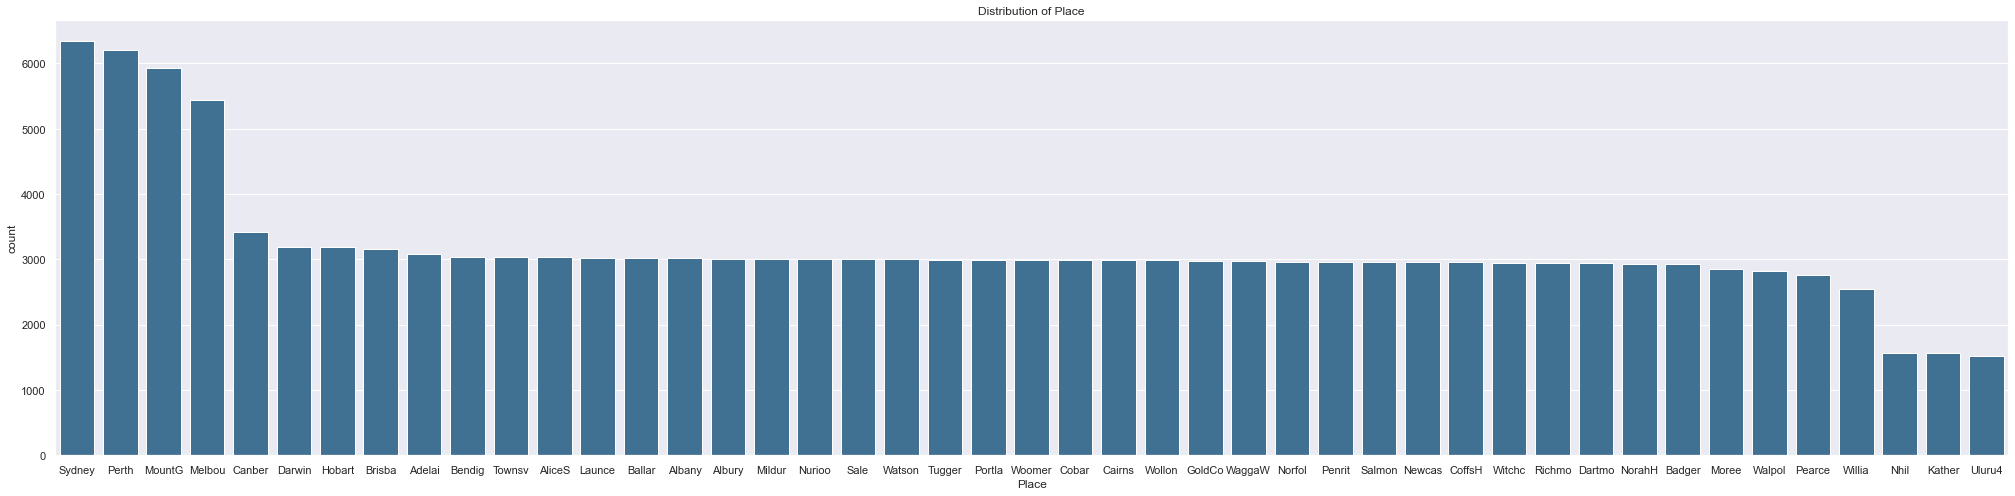

In [6]:
sns.set_style('ticks')

sns.set(rc={'figure.figsize':(35,8)})
sns.countplot(data = rain, x = 'Place', order = rain['Place'].value_counts().index, color = '#3274a1').set_title("Distribution of Place")

plt.show()

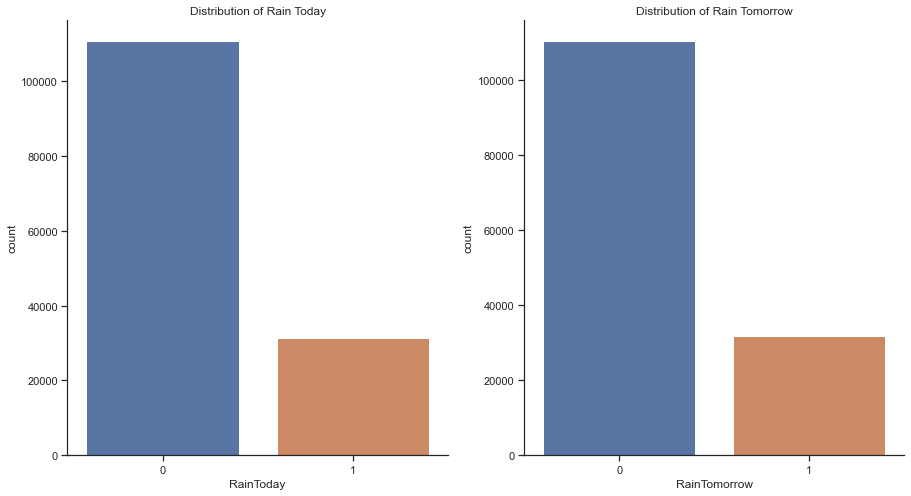

In [7]:
sns.set_style('ticks')

fig, axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(data = rain, x = 'RainToday', ax = axes[0]).set_title("Distribution of Rain Today")
sns.countplot(data = rain, x = 'RainTomorrow', ax = axes[1]).set_title("Distribution of Rain Tomorrow")

sns.despine()

plt.show()

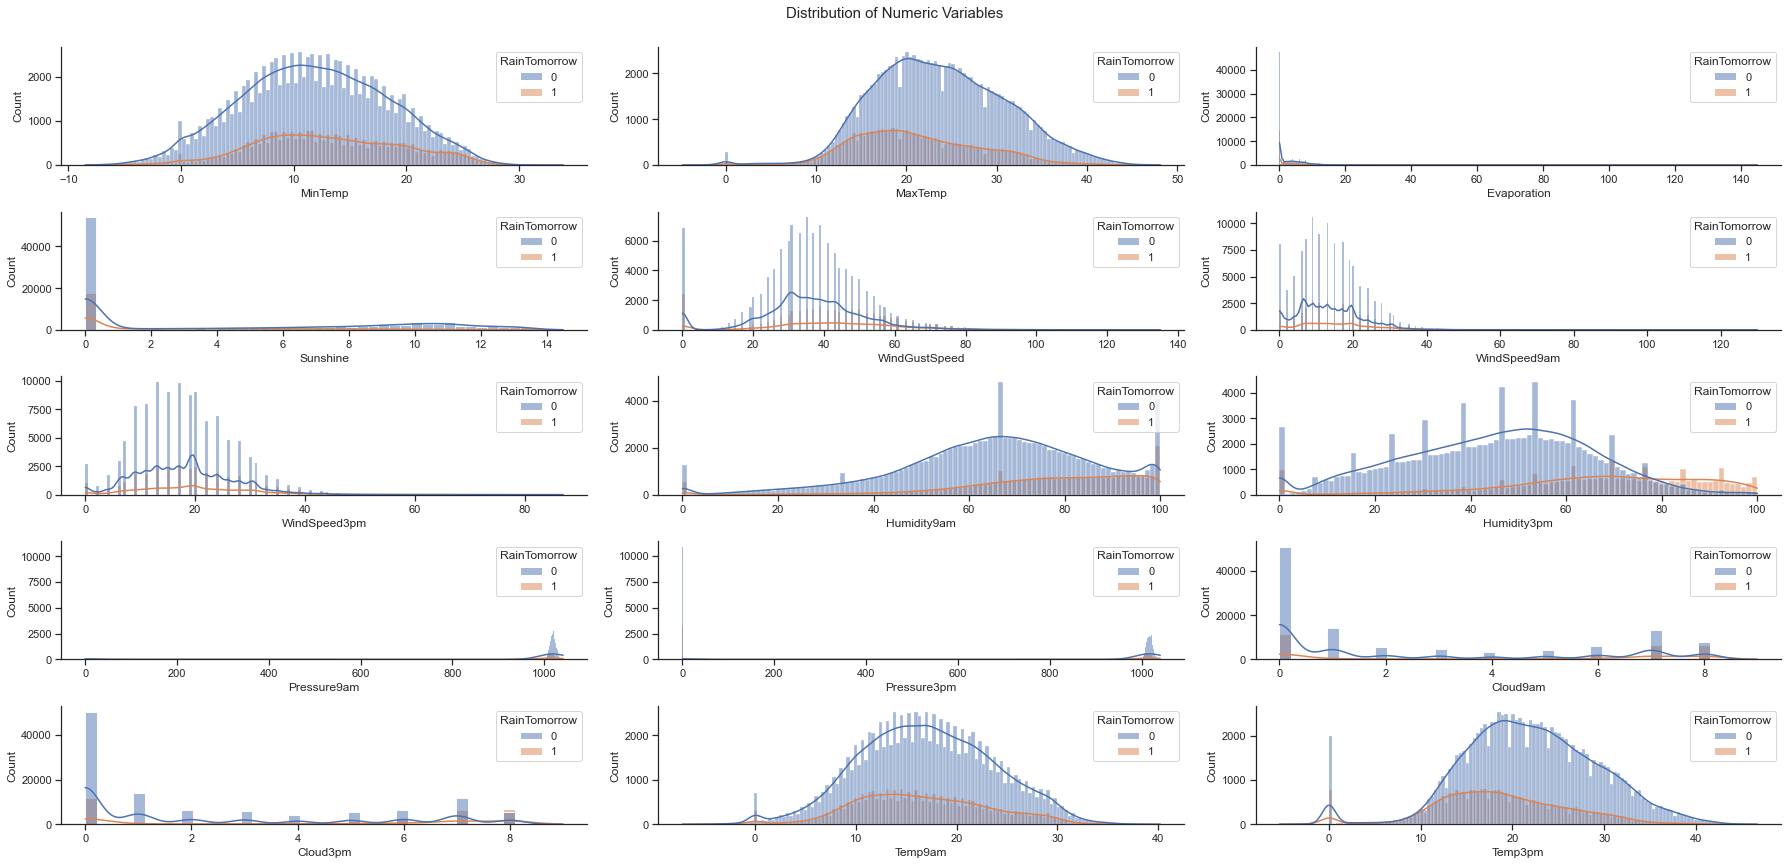

In [8]:
sns.set_style('ticks')

fig, axes = plt.subplots(5,3, figsize = (25,12))
plt.suptitle('Distribution of Numeric Variables', fontsize = 15, y = 1)

for col, ax in zip(numeric_vars, axes.flat):
    #plot the histogram
    sns.histplot(data = rain,
                x = col,
                kde = True,
                hue = 'RainTomorrow',
                ax = ax)

    def move_legend(ax, new_loc, **kws):
        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()
        ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
    move_legend(ax, "upper right")

    #chart formatting
    sns.despine()
    

plt.tight_layout()

plt.show()

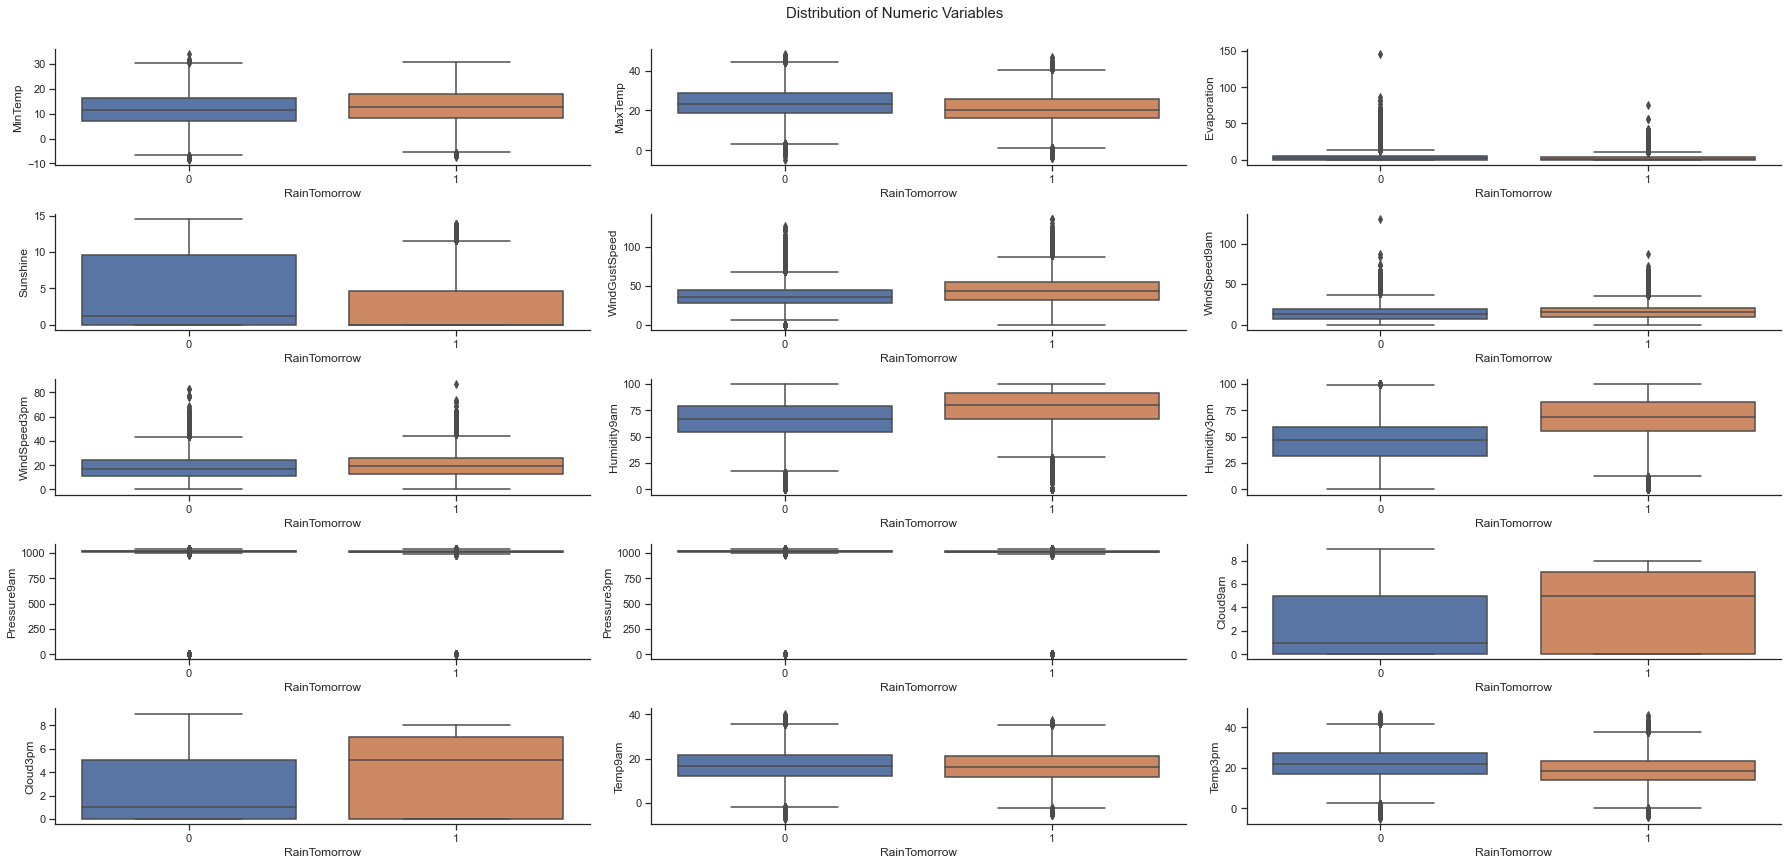

In [9]:
sns.set_style('ticks')

fig, axes = plt.subplots(5,3, figsize = (25,12))
plt.suptitle('Distribution of Numeric Variables', fontsize = 15, y = 1)

for col, ax in zip(numeric_vars, axes.flat):
    #plot the histogram
    sns.boxplot(data = rain,
                   x = 'RainTomorrow',
                   y = col,
                   ax = ax)

    #chart formatting
    sns.despine()
    

plt.tight_layout()

plt.show()

### Custom Functions for Model Evaluation

In [10]:
metrics = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC'])

def eval(model, y_test, y_pred):
    model = model
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    eval_df = pd.DataFrame({'Model':model,
                        'Accuracy':acc,
                        'Precision':pre,
                        'Recall':rec,
                        'F-Score':f1,
                        'AUC':auc}, index = [0])

    return eval_df

### Model Building

TRAIN TEST SPLIT

In [11]:
# Calculate test data based on the distribution of of target variable to avoid bias

train_count = round(rain.RainTomorrow.value_counts()[1] * .70,0)
train_count

22314.0

In [12]:
y = rain['RainTomorrow']
y0 = rain[rain['RainTomorrow'] == 0]['RainTomorrow']
y1 = rain[rain['RainTomorrow'] == 1]['RainTomorrow']

y1_train = y1.sample(n = int(train_count), replace = False, random_state = 123)
y0_train = y0.sample(n = int(train_count), replace = False, random_state = 123)

y_train = pd.concat([y0_train, y1_train]).sort_index()
y_test = y[ ~ y.index.isin(y_train.index)]

x = rain.drop(columns = ['ID','RainTomorrow'])

encoder = LabelEncoder()
encoder.fit(x['Place'])
x['Place'] = encoder.transform(x['Place'])

x_train = x[~x.index.isin(y_test.index)]
x_test = x[x.index.isin(y_test.index)]

assert len(y_train) + len(y_test) == len(y)
assert y_train.index.isin(y_test.index).sum() == 0
assert y_train.index.all() == x_train.index.all()
assert y_test.index.all() == x_test.index.all()


#### LOGISTIC REGRESSION

MODEL TUNING

In [13]:
# Logistic Regression

# Define steps
steps = [('scaler', StandardScaler()),
         ('logistic', LogisticRegression())]

# Instantiate pipeline object
pipeline = Pipeline(steps)

# Define parameters
penalty = ['l2']
c = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']

parameters = dict(logistic__penalty = penalty, logistic__C = c, logistic__solver = solvers)

model_tuning = GridSearchCV(pipeline, parameters, error_score = 'raise', cv = 5)
model_tuning.fit(x_train, y_train)

print(model_tuning.best_score_)
print(model_tuning.best_params_)

0.7431887483203006
{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}


MODEL BUILDING

In [14]:
# Define steps
steps = [('scaler', StandardScaler()),
         ('logistic', LogisticRegression(C = 100,
                                         penalty = 'l2',
                                         solver = 'newton-cg'))]


log = Pipeline(steps)

log.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=100, solver='newton-cg'))])

FORECASTING

In [15]:
log_predictions = pd.DataFrame(log.predict(x_test))
log_predictions_prob = pd.DataFrame(log.predict_proba(x_test))[1]

log_predictions.index = x_test.index
log_predictions_prob.index = x_test.index

log_predictions = pd.concat([y_test, log_predictions, log_predictions_prob], axis = 1, ignore_index = True)
log_predictions.columns = ['Actual', 'Predicted', 'Predicted Probability of Rain']

CONFUSION MATRIX

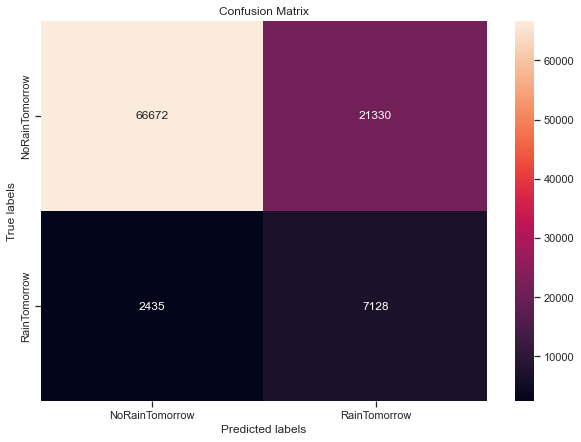

In [16]:
cm = confusion_matrix(log_predictions['Actual'], log_predictions['Predicted'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

ADJUST PROBABILITY to 60

In [17]:
log_predictions['Predicted_60'] = 0
for i in log_predictions.index:
    if log_predictions.loc[i, 'Predicted Probability of Rain'] >= .60:
        log_predictions.loc[i, 'Predicted_60'] = 1

In [18]:
log_metrics = eval('Logistic Regression_60', log_predictions['Actual'], log_predictions['Predicted_60'])
metrics = pd.concat([metrics, log_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436


EVALUATION METRICS

In [19]:
log_metrics = eval('Logistic Regression_50', log_predictions['Actual'], log_predictions['Predicted'])
metrics = pd.concat([metrics, log_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496


ADJUST PROBABILITY to 65

In [20]:
log_predictions['Predicted_65'] = 0
for i in log_predictions.index:
    if log_predictions.loc[i, 'Predicted Probability of Rain'] >= .65:
        log_predictions.loc[i, 'Predicted_65'] = 1

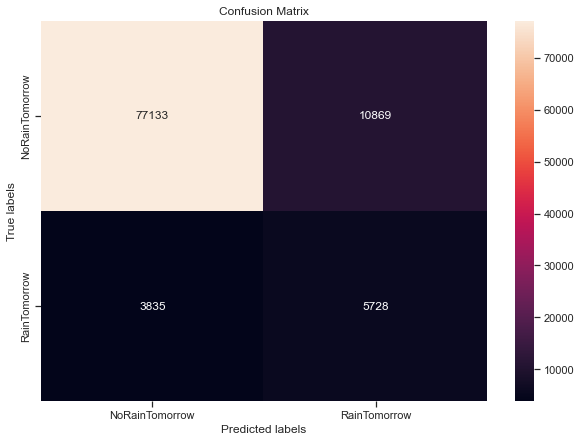

In [21]:
cm = confusion_matrix(log_predictions['Actual'], log_predictions['Predicted_65'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

In [22]:
log_metrics = eval('Logistic Regression_65', log_predictions['Actual'], log_predictions['Predicted_65'])
metrics = pd.concat([metrics, log_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733


ADJUST PROBABILITY to 70

In [23]:
log_predictions['Predicted_70'] = 0
for i in log_predictions.index:
    if log_predictions.loc[i, 'Predicted Probability of Rain'] >= .70:
        log_predictions.loc[i, 'Predicted_70'] = 1

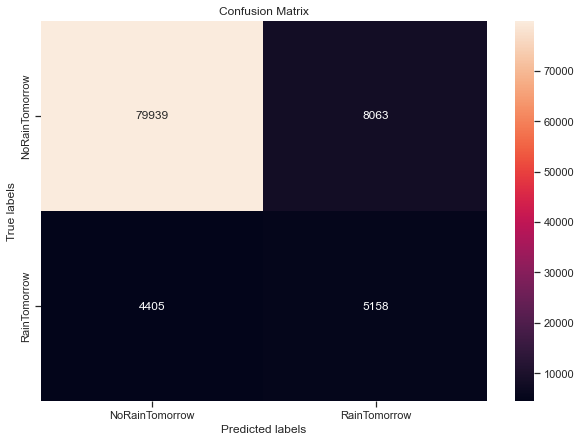

In [24]:
cm = confusion_matrix(log_predictions['Actual'], log_predictions['Predicted_70'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

In [25]:
log_metrics = eval('Logistic Regression_70', log_predictions['Actual'], log_predictions['Predicted_70'])
metrics = pd.concat([metrics, log_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874


ADJUST PROBABILITY to 40

In [26]:
log_predictions['Predicted_40'] = 0
for i in log_predictions.index:
    if log_predictions.loc[i, 'Predicted Probability of Rain'] >= .40:
        log_predictions.loc[i, 'Predicted_40'] = 1

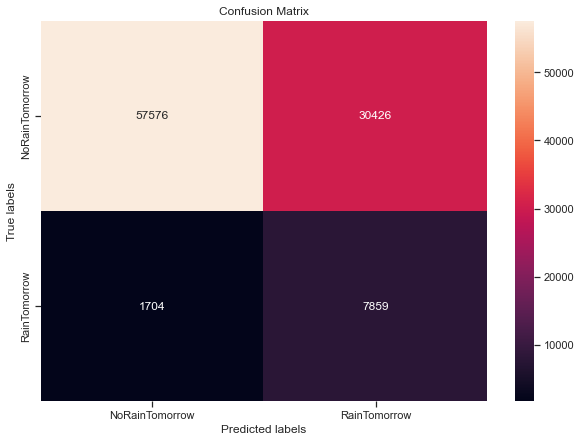

In [27]:
cm = confusion_matrix(log_predictions['Actual'], log_predictions['Predicted_40'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

In [28]:
log_metrics = eval('Logistic Regression_40', log_predictions['Actual'], log_predictions['Predicted_40'])
metrics = pd.concat([metrics, log_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874
0,Logistic Regression_40,0.670681,0.205276,0.821813,0.328499,0.738036


#### DECISION TREE

MODEL TUNING

In [29]:
# Decision Tree

# Define steps
steps = [('scaler', StandardScaler()),
         ('dt', DecisionTreeClassifier())]

# Instantiate pipeline object
pipeline = Pipeline(steps)

# Define parameters
max_depth = range(1,11,1)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = np.arange(1,18,1)

parameters = dict(dt__max_depth = max_depth, dt__min_samples_leaf = min_samples_leaf, dt__max_features = max_features)

model_tuning = GridSearchCV(pipeline, parameters, error_score = 'raise')
model_tuning.fit(x_train, y_train)

print(model_tuning.best_score_)
print(model_tuning.best_params_)

0.7353235460440058
{'dt__max_depth': 10, 'dt__max_features': 11, 'dt__min_samples_leaf': 0.1}


MODEL BUILDING

In [40]:
# Define steps
steps = [('scaler', StandardScaler()),
         ('dt', DecisionTreeClassifier(max_depth = 10,
                                       max_features = 11,
                                       min_samples_leaf = .1))]


dt = Pipeline(steps)

dt.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, max_features=11,
                                        min_samples_leaf=0.1))])

FORECASTING

In [41]:
dt_predictions = pd.DataFrame(dt.predict(x_test))

dt_predictions.index = x_test.index

dt_predictions = pd.concat([y_test, dt_predictions], axis = 1, ignore_index = True)
dt_predictions.columns = ['Actual', 'Predicted']

CONFUSION MATRIX

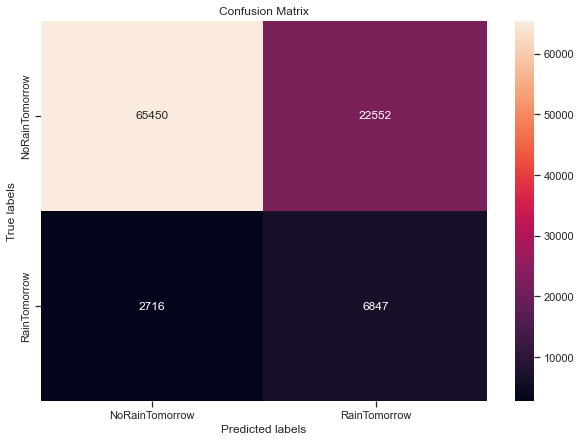

In [42]:
cm = confusion_matrix(dt_predictions['Actual'], dt_predictions['Predicted'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

EVALUATION METRICS

In [43]:
dt_metrics = eval('Decision Tree', dt_predictions['Actual'], dt_predictions['Predicted'])
metrics = pd.concat([metrics, dt_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874
0,Logistic Regression_40,0.670681,0.205276,0.821813,0.328499,0.738036
0,Decision Tree,0.741014,0.232899,0.715989,0.351471,0.729861


#### RANDOM FOREST

MODEL TUNING

In [44]:
# Random Forest

# Define steps
steps = [('scaler', StandardScaler()),
         ('rf', RandomForestClassifier())]

# Instantiate pipeline object
pipeline = Pipeline(steps)

# Define parameters
max_depth = range(1,11,1)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = np.arange(1,18,1)

parameters = dict(rf__max_depth = max_depth, rf__min_samples_leaf = min_samples_leaf, rf__max_features = max_features)

model_tuning = GridSearchCV(pipeline, parameters, error_score = 'raise', n_jobs = -1)
model_tuning.fit(x_train, y_train)

print(model_tuning.best_score_)
print(model_tuning.best_params_)

0.7508971506146712
{'rf__max_depth': 5, 'rf__max_features': 2, 'rf__min_samples_leaf': 0.1}


MODEL BUILDING

In [45]:
# Define steps
steps = [('scaler', StandardScaler()),
         ('rf', RandomForestClassifier(max_depth = 5,
                                       max_features = 2,
                                       min_samples_leaf = .1))]


rf = Pipeline(steps)

rf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=5, max_features=2,
                                        min_samples_leaf=0.1))])

FORECASTING

In [46]:
rf_predictions = pd.DataFrame(rf.predict(x_test))

rf_predictions.index = x_test.index

rf_predictions = pd.concat([y_test, rf_predictions], axis = 1, ignore_index = True)
rf_predictions.columns = ['Actual', 'Predicted']

CONFUSION MATRIX

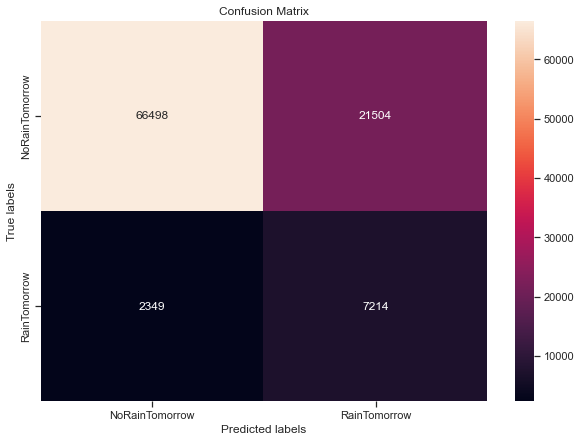

In [47]:
cm = confusion_matrix(rf_predictions['Actual'], rf_predictions['Predicted'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

EVALUATION METRICS

In [48]:
rf_metrics = eval('Random Forest Classifier', rf_predictions['Actual'], rf_predictions['Predicted'])
metrics = pd.concat([metrics, rf_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874
0,Logistic Regression_40,0.670681,0.205276,0.821813,0.328499,0.738036
0,Decision Tree,0.741014,0.232899,0.715989,0.351471,0.729861
0,Random Forest Classifier,0.755517,0.251201,0.754366,0.376897,0.755004


#### SUPPORT VECTOR MACHINE

MODEL BUILDING

In [49]:
# Define steps
steps = [('scaler', StandardScaler()),
         ('svm', SVC())]


svm = Pipeline(steps)

svm.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

FORECASTING

In [50]:
svm_predictions = pd.DataFrame(svm.predict(x_test))

svm_predictions.index = x_test.index

svm_predictions = pd.concat([y_test, svm_predictions], axis = 1, ignore_index = True)
svm_predictions.columns = ['Actual', 'Predicted']

CONFUSION MATRIX

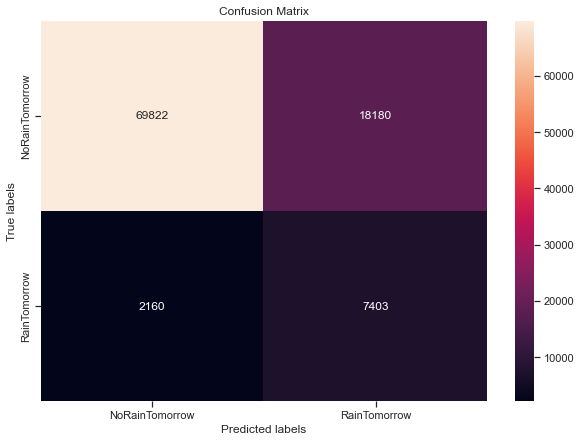

In [51]:
cm = confusion_matrix(svm_predictions['Actual'], svm_predictions['Predicted'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

EVALUATION METRICS

In [52]:
svm_metrics = eval('Support Vector Machine', svm_predictions['Actual'], svm_predictions['Predicted'])
metrics = pd.concat([metrics, svm_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874
0,Logistic Regression_40,0.670681,0.205276,0.821813,0.328499,0.738036
0,Decision Tree,0.741014,0.232899,0.715989,0.351471,0.729861
0,Random Forest Classifier,0.755517,0.251201,0.754366,0.376897,0.755004
0,Support Vector Machine,0.791524,0.289372,0.774129,0.421271,0.783772


#### LGBM CLASSIFIER

MODEL BUILDING

In [53]:
# Define steps
steps = [('scaler', StandardScaler()),
         ('lgbm', LGBMClassifier())]


lgbm = Pipeline(steps)

lgbm.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lgbm', LGBMClassifier())])

FORECASTING

In [54]:
lgbm_predictions = pd.DataFrame(lgbm.predict(x_test))

lgbm_predictions.index = x_test.index

lgbm_predictions = pd.concat([y_test, lgbm_predictions], axis = 1, ignore_index = True)
lgbm_predictions.columns = ['Actual', 'Predicted']

CONFUSION MATRIX

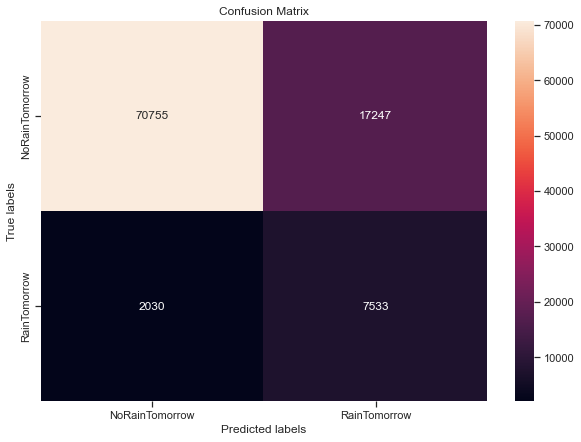

In [55]:
cm = confusion_matrix(lgbm_predictions['Actual'], lgbm_predictions['Predicted'])

fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']); 
ax.yaxis.set_ticklabels(['NoRainTomorrow', 'RainTomorrow']);

EVALUATION METRICS

In [56]:
lgbm_metrics = eval('LGBM Classifier', lgbm_predictions['Actual'], lgbm_predictions['Predicted'])
metrics = pd.concat([metrics, lgbm_metrics])
metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regression_60,0.822488,0.308645,0.654083,0.419391,0.747436
0,Logistic Regression_50,0.756419,0.250474,0.745373,0.374951,0.751496
0,Logistic Regression_65,0.849290,0.345123,0.598975,0.437920,0.737733
0,Logistic Regression_70,0.872208,0.390137,0.539370,0.452774,0.723874
0,Logistic Regression_40,0.670681,0.205276,0.821813,0.328499,0.738036
0,Decision Tree,0.741014,0.232899,0.715989,0.351471,0.729861
0,Random Forest Classifier,0.755517,0.251201,0.754366,0.376897,0.755004
0,Support Vector Machine,0.791524,0.289372,0.774129,0.421271,0.783772
0,LGBM Classifier,0.802419,0.303995,0.787724,0.438692,0.795870


EXPORT METRICS

In [61]:
lgbm_metrics = eval('LGBM Classifier', lgbm_predictions['Actual'], lgbm_predictions['Predicted'])
lgbm_metrics

,Model,Accuracy,Precision,Recall,F-Score,AUC
0,LGBM Classifier,0.802419,0.303995,0.787724,0.438692,0.79587


In [57]:
metrics.to_csv('Classification Model Evaluation.csv', index = False)